In [1]:
from keras.datasets import mnist #untuk mengambil dataset MNIST Digit Recognition
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math 

(X_train, y_train), (X_test, y_test) = mnist.load_data() #mnist data set
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') #mengubah matriks menjadi vektor
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train=X_train[:1000]
X_test=X_test[:100]
X_train = X_train / 255 #normalisasi data
X_test = X_test / 255 




Using TensorFlow backend.


In [2]:
def pengurangan_vector(a,b):
    d=[]
    a=list(map(float,a))
    b=list(map(float,b))
    for i in range((len(a))):
        c=abs(a[i]-b[i])
        d.append(c)
    return d
"""
a=[1,2]
b=[5,5]
c=pengurangan_vector(a,b)
print(c)
"""

'\na=[1,2]\nb=[5,5]\nc=pengurangan_vector(a,b)\nprint(c)\n'

In [3]:
def Eucli_func(vector): #rumus mencari Euclidean Distance
    kuadrat=list(map(lambda x: x**2, vector))
    result=math.sqrt(sum(kuadrat))
    return result


In [4]:
def similarity(training_data,target): # fungsi untuk menghasilkan list dari Euclidean Distance di training data
    list_val=[]
    for i in range(len(training_data)):
        #training=i.split(",")
        a=pengurangan_vector(target,training_data[i])
        result=Eucli_func(a)
        list_val.append([result,y_train[i]])
    return list_val


In [5]:
def knn_scratch(lists,neighbors=3):
    newlist=sorted(lists)
    p=newlist[:neighbors]
    dicts={}
    for a in p:
        if a[1] in dicts:
            dicts[a[1]]+=1
        else:
            dicts[a[1]]=1
    output=max(dicts, key=dicts.get)
    return output
#knn_scratch(k)

In [6]:
%%time
def accuracy():
    akurasi=[]
    for i in range(len(X_test)):
        list_val=similarity(X_train,X_test[i])
        akurasi.append(int(knn_scratch(list_val)==y_test[i]))
    nilai_akurasi=sum(akurasi)/len(akurasi)*100
    return nilai_akurasi
nilai=accuracy()
print(nilai)

82.0
Wall time: 1min 41s


<function knn_scratch at 0x0000021216A80950>


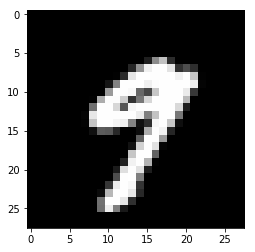

In [27]:
#prediksi digit menggunakan KNN
list_val=similarity(X_train,X_test[20])
knn_scratch(list_val)
print(knn_scratch(list_val))

#print gambar digit
X_test1=X_test*255
X_test1=X_test1.reshape(10000,28,28)
plt.imshow(X_test1[20], cmap=plt.get_cmap('gray'))
plt.show()

In [28]:
print(knn_scratch(list_val))

9
